In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
#impoting necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#importing the data with pandas
train_data= pd.read_csv('/kaggle/input/titanic/train.csv')
test_data= pd.read_csv('/kaggle/input/titanic/test.csv')

In [6]:
#to look for null values and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# to better understand the numeric data we use describe method
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#seperate the numeric and cartegorical data seperately in the training set
num_data= train_data[['Age', 'SibSp', 'Parch', 'Fare']]
cat_data= train_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

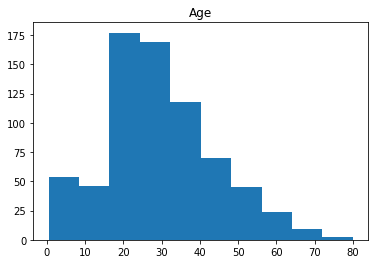

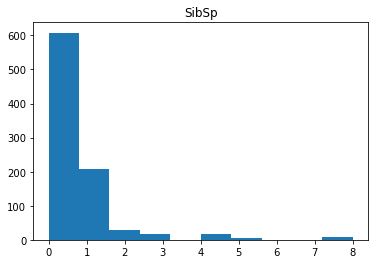

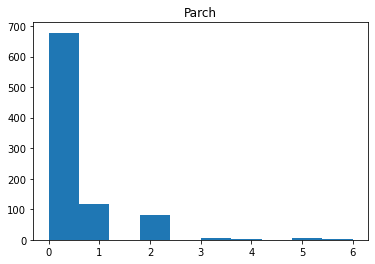

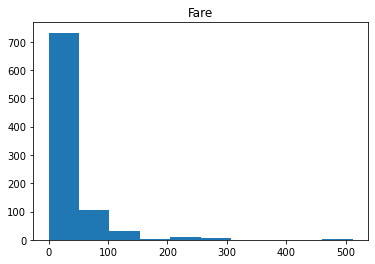

In [10]:
# then we will visualise them seperately
# we use histograms for numerical data and value counts for categorical data

for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

If the data is not seems to be fairly distributed we should try to normalise it!!!!!!

in this case "Fare" is something i think that we may need to normalize it.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

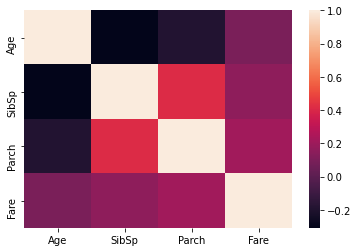

In [11]:
#now lets look at some correlations
print(num_data.corr())
sns.heatmap(num_data.corr())

we see that number of parents and siblings are somewhat correlated which tells us that families tend to travel together.

In [12]:
# now we compare the survival acroos the numeric data
pd.pivot_table(index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'], data= train_data)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


* here we got to know that, on an average younger people survived than the older ones.
* people that paid high fare(rich), had more cnances of sirvival.
* if you are a kid than you have more chances of sirvival, maybe brcause your parent tried to save you.
* if you have a sibling, you have a silghtly less chance of sirvival.

In [13]:
cat_data.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


In [14]:
cat_data.value_counts()

Survived  Pclass  Sex     Ticket    Cabin            Embarked
0         1       female  113781    C22 C26          S           2
1         1       female  113760    B96 B98          S           2
0         1       male    35281     D26              S           2
                          19950     C23 C25 C27      S           2
1         1       female  PC 17608  B57 B59 B63 B66  C           2
                                                                ..
                          PC 17610  B4               C           1
                          PC 17599  C85              C           1
                          PC 17592  D28              S           1
                          PC 17572  D33              C           1
                          13568     B39              C           1
Length: 184, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


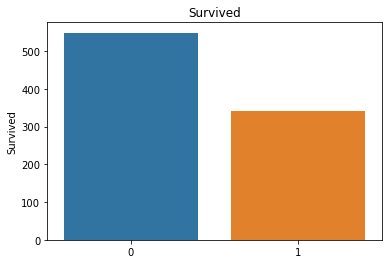

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


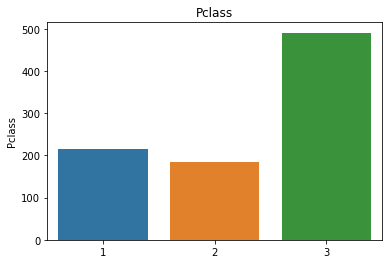

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


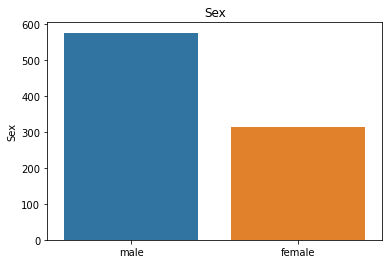

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


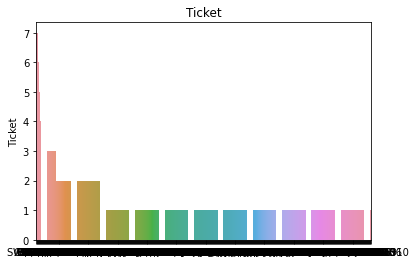

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


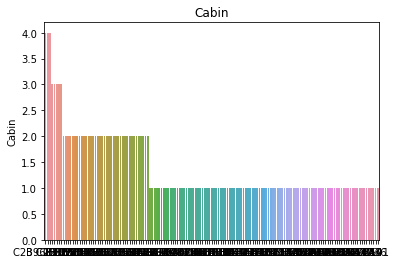

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


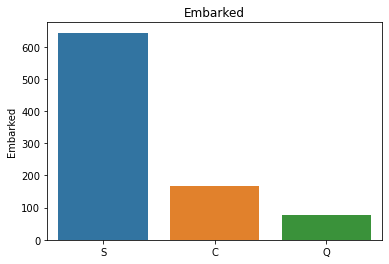

In [15]:
# now we do a similar steps with the categorical values as well.
for i in cat_data.columns:
    sns.barplot(cat_data[i].value_counts().index, cat_data[i].value_counts()).set_title(i)
    plt.show()

In [16]:
print(pd.pivot_table(index='Survived', values='Ticket', columns=['Sex'], aggfunc='count', data=train_data))
print()
print(pd.pivot_table(index='Survived', values='Ticket', columns=['Pclass'], aggfunc='count', data=train_data))
print()
print(pd.pivot_table(index='Survived', values='Ticket', columns=['Embarked'], aggfunc='count', data=train_data))

Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# **Feature Engineering**

* Cabins- Evaluated if the cabin letter or the purchase of tickets across multiple cabins affected survival?
* Does a persons title affect survival rate?

In [17]:
cat_data.Cabin
train_data['multiple_cabin']= train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))

test_data['multiple_cabin']= test_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))

In [18]:
train_data['multiple_cabin'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: multiple_cabin, dtype: int64

In [19]:
pd.pivot_table(index='Survived', columns='multiple_cabin', values='Ticket', aggfunc='count', data=train_data)

multiple_cabin,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [20]:
# now let us look that if the start letter of the cabin number has to do with the survival of the people.
# lets create a category for each unique letter(n stands for null)
# null values will have its own category
train_data['cabin_letter']= train_data.Cabin.apply(lambda x: str(x)[0])

test_data['cabin_letter']= train_data.Cabin.apply(lambda x: str(x)[0])

In [21]:
train_data['cabin_letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

In [22]:
# comparing survival rate with cabin
pd.pivot_table(index='Survived', columns='cabin_letter', values='Ticket', aggfunc='count', data=train_data)

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


every ticket was quite unique, so i did not find it useul enough to check the survival rate for a specific kind of ticket!

In [23]:
# now lets see for a persons title, does having a certain title increases your chane of surviving?
train_data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [24]:
train_data['name_title']= train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

test_data['name_title']= test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [25]:
train_data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Sir               1
Mme               1
Lady              1
Ms                1
Jonkheer          1
Don               1
Name: name_title, dtype: int64

In [26]:
pd.pivot_table(train_data, index='Survived', values='Ticket', columns='name_title', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


# DATA PREPROCESSING
* Here we will deal with missing values, scaling problems and things like that:
* first and foremost we will keep only relavanet data in our training data we will drop some unwanted columns.
* then we will replace the numerical missing values with their median(cause its the best way).
* then we would create dummies for the categorical variables.
* then we would have to normalize some data with logarithms and standard normalization.

# REMEMBER: Whatever you did with the train_data untill now, you have to do the same for the test data as well.
# **You must make sure that the test data and the train data should have same number of columns and they should have the same name as well.

In [27]:
# deal with null values for continuous data 
train_data.Age= train_data.Age.fillna(train_data.Age.median())
test_data.Age= test_data.Age.fillna(test_data.Age.median())

train_data.Fare= train_data.Fare.fillna(train_data.Fare.median())
test_data.Fare= train_data.Fare.fillna(test_data.Fare.median())

In [28]:
# drop rows with null "embarked" values(only two are there)
train_data['Embarked'].dropna(inplace=True)
test_data['Embarked'].dropna(inplace=True)

In [29]:
# we normalize the data that is not uniformly distributed
# log  normalization for the fare
# converted fare to category for pd.get_dummies
train_data['norm_fare']= np.log(train_data.Fare+1)
test_data['norm_fare']= np.log(test_data.Fare+1)

In [30]:
# converted the datatype of Pclass from int to string to use it as a category in pd.get_dummies
train_data['Pclass']= train_data.Pclass.astype(str)
test_data['Pclass']= test_data.Pclass.astype(str)

In [31]:
# created dummies for categories
train_final= pd.get_dummies(train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'multiple_cabin', 'cabin_letter', 'name_title', 'norm_fare']])

test_final= pd.get_dummies(test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'multiple_cabin', 'cabin_letter', 'name_title', 'norm_fare']])

In [32]:
train2,test2 = train_final.align(test_final, join='outer', axis=1, fill_value=0)

# NOW WE SCALE ALL THE DATA

In [33]:
# SCALING NUMMERIC DATA WITH SCIKIL-LEARN
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train2_scaled= train2.copy()
test2_scaled= test2.copy()

train2_scaled[['Age','SibSp','Parch','norm_fare']] = scaler.fit_transform(train2_scaled[['Age','SibSp','Parch','norm_fare']])
test2_scaled[['Age','SibSp','Parch','norm_fare']] = scaler.fit_transform(test2_scaled[['Age','SibSp','Parch','norm_fare']])

X_train= train2_scaled
X_test= test2_scaled

y_train= train_data.Survived

# Now we compare different models

Now we will try out a bunch of different model on the training data to get a idea how our model will perform. We will use cross-validation here to ensure that the model does not simply memorize the data. With the help of cross-validation the model will get the mixed up data making it a new dataset altogether.

We will try these models :-

* Naive Bayes
* Logistic Regression
* Decision Tree
* KNN
* Randon Forest
* SUpport Vector Classifier
* XG Boost
* Soft Voting Classifier- (all models)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [35]:
# the naive bayes is benchmark for every model. Its good to start here!
gnb= GaussianNB() #(scaled)
cv= cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.67039106 0.70786517 0.75842697 0.74719101 0.73033708]
0.722842257234323


In [36]:
gnb= GaussianNB()
cv= cross_val_score(gnb, train2, y_train, cv=5)
print(cv)
print(cv.mean())

[0.67039106 0.70224719 0.76966292 0.75842697 0.73033708]
0.726213043751177


In [37]:
# Logistic Regression(scaled)
lr= LogisticRegression()
cv= cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.81460674 0.80337079 0.82022472 0.84831461]
0.822666499278137


In [38]:
lr= LogisticRegression()
cv= cross_val_score(lr, train2, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.81460674 0.79775281 0.82022472 0.85393258]
0.822666499278137


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [39]:
# decesion tree classifier(scaled)
dt= tree.DecisionTreeClassifier(random_state= 1)
cv= cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76536313 0.7752809  0.83146067 0.74719101 0.8258427 ]
0.7890276818780994


In [40]:
dt= tree.DecisionTreeClassifier(random_state= 1)
cv= cross_val_score(dt, train2, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75977654 0.7752809  0.83146067 0.74719101 0.8258427 ]
0.7879103634423451


In [41]:
# KNN
knn= KNeighborsClassifier()
cv= cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.79213483 0.85393258 0.82022472 0.87078652]
0.8316615403929445


In [42]:
knn= KNeighborsClassifier()
cv= cross_val_score(knn, train2, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76536313 0.80337079 0.81460674 0.82022472 0.83707865]
0.8081288054736049


In [43]:
# random forest classifier(scaled)
rfc= RandomForestClassifier()
cv= cross_val_score(rfc, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.79888268 0.78089888 0.84269663 0.75280899 0.84269663]
0.8035967610319503


In [44]:
rfc= RandomForestClassifier()
cv= cross_val_score(rfc, train2, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.79213483 0.85955056 0.75280899 0.83707865]
0.8136777352331931


In [45]:
#SVC(scaled)
svc= SVC(probability=True)
cv= cross_val_score(svc, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.8258427  0.8258427  0.80337079 0.86516854]
0.8316427091833531


In [46]:
svc= SVC(probability= True)
cv= cross_val_score(svc, train2, y_train, cv=5)
print(cv)
print(cv.mean())

[0.68715084 0.76966292 0.71348315 0.71910112 0.74157303]
0.7261942125415856


In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.82681564 0.8258427  0.85393258 0.78089888 0.83146067]
0.8237900947837549


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0.82681564 0.8258427  0.85393258 0.78089888 0.83146067]

0.8237900947837549

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,train2,y_train,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.83240223 0.8258427  0.85393258 0.78089888 0.83146067]
0.8249074132195091


[0.83240223 0.8258427  0.85393258 0.78089888 0.83146067]

0.8249074132195091

* Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
* A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such

In [49]:
from sklearn.ensemble import VotingClassifier
voting_clf= VotingClassifier(estimators= [('lr', lr), ('knn', knn), ('xgb', xgb), ('rfc', rfc), ('svc', svc), ('gnb', gnb)], voting='soft')

In [50]:
cv= cross_val_score(voting_clf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[18:38:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.83240223 0.81460674 0.83707865 0.80337079 0.85955056]
0.8294017952419811


[0.83240223 0.81460674 0.83146067 0.80337079 0.85955056]

0.8282781997363632

# MODEL TUNING

Now that we have analyzed the performance of several model, now we will try to enhace the performace of the models by parameter tuning.
this will improve our model results.
here we will use GridSearchCV (used Randomized Search for the Random Forest and XG boosted model to simplify testing time).

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

* Grid Search allows you to put in a bunch of parameters and try them all, and it will give you the best suited parameter.

In [52]:
def performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [53]:
# 1. Logistic Regression
lr= LogisticRegression()
param_grid={
    "C": [1, 3, 10, 20, 30, 40],
    "solver": ["lbfgs", "liblinear"],
    'max_iter' : [2000] 
}
lr_grid= GridSearchCV(lr, param_grid=param_grid, verbose=True, cv=5, n_jobs=-1)
best_lr= lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [54]:
performance(best_lr, 'logistic regression')

logistic regression
Best Score: 0.8226727763480006
Best Parameters: {'C': 10, 'max_iter': 2000, 'solver': 'liblinear'}


In [55]:
# 2. KNN
knn= KNeighborsClassifier()
param_grid= {'n_neighbors' : [3,5,7,9],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
            'p' : [1, 2]}
knn_grid= GridSearchCV(knn, param_grid=param_grid, verbose=True, cv=5, n_jobs=-1)
best_knn= knn_grid.fit(X_train, y_train)
performance(best_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8316615403929445
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [56]:
# 3. SVC
svc= SVC(probability=True)
param_grid= {
    "C": [1, 3, 10, 30, 100],
    "kernel": ["linear", "poly", "rbf" , "sigmoid"],
}
svc_grid= GridSearchCV(svc, param_grid=param_grid, verbose= True, cv=5, n_jobs=-1)
best_svc= svc_grid.fit(X_train, y_train)
performance(best_svc, 'SVC')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVC
Best Score: 0.8316427091833531
Best Parameters: {'C': 1, 'kernel': 'rbf'}


In [57]:
# 4. Random Forest Classifier
rf= RandomForestClassifier(random_state=1)
param_grid= {'n_estimators': [400, 450, 500, 550],
            'criterion': ['gini', 'entropy'],
            'bootstrap': [True],
            'max_depth': [15, 20, 25],
            'max_features': ['auto', 'sqrt', 10],
            'min_samples_leaf': [2,3],
            'min_samples_split': [2,3]}
rf_grid= GridSearchCV(rf, param_grid=param_grid, verbose=True, cv=5, n_jobs=-1)
best_rf= rf_grid.fit(X_train, y_train)
performance(best_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [ ]:
# lets just visualize the most influencial features in our model
best_rf = best_rf.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# 5. Xtreme Gradient Boosting(XGBoost)
xgb= XGBClassifier(random_state=1)
param_grid= {'n_estimators': [450, 500, 500],
            'colsample_bytree': [0.75,0.8,0.85],
            'reg_alpha': [1],
            'max_depth': [None],
            'reg_lambda': [2,5,10],
            'sub_sample': [0.55,0.6,0.65],
            'learning_rate': [0.5],
            'gamma': [0.5,1,2],
            'min_child_weight': [0.01],
            'sampling_method': ['uniform']}
xgb_grid= GridSearchCV(xgb, param_grid=param_grid, verbose=True, cv=5, n_jobs=-1)
best_xgb= xgb_grid.fit(X_train, y_train)
performance(best_xgb, 'XGB')

# comparing models
Now i will be using voting classifier to compare these models and make an overall prediction.

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators= [('lg', lr_grid.best_estimator_), ('knn', knn_grid.best_estimator_), ('svc', svc_grid.best_estimator_), ('rf', rf_grid.best_estimator_), ('xgb', xgb_grid.best_estimator_)]
model= VotingClassifier(estimators=estimators, voting= 'hard')

In [ ]:
model.fit(X_train, y_train)

In [58]:
model.score(X_train, y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': X_test.index,
                       'Survived': preds})

output.to_csv('submission.csv', index=False)